In [1]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


import tensorflow as tf
from keras.backend import tensorflow_backend

config = tf.compat.v1.ConfigProto(gpu_options=tf.compat.v1.GPUOptions(allow_growth=True))
session = tf.compat.v1.Session(config=config)
tensorflow_backend.set_session(session)

ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=10000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=10000, visualize=True, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=True)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_3 (Activation)    (None, 16)               

C:\Users\horig\Anaconda3\envs\rl-book\lib\site-packages\rl\memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   25/10000: episode: 1, duration: 1.539s, episode steps: 25, steps per second: 16, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.560 [0.000, 1.000], mean observation: -0.075 [-1.581, 0.783], loss: 0.498124, mae: 0.519847, mean_q: 0.082007


C:\Users\horig\Anaconda3\envs\rl-book\lib\site-packages\rl\memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   48/10000: episode: 2, duration: 0.383s, episode steps: 23, steps per second: 60, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.652 [0.000, 1.000], mean observation: -0.015 [-2.217, 1.421], loss: 0.393391, mae: 0.543421, mean_q: 0.365445
   72/10000: episode: 3, duration: 0.399s, episode steps: 24, steps per second: 60, episode reward: 24.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.458 [0.000, 1.000], mean observation: 0.101 [-0.730, 1.389], loss: 0.249876, mae: 0.626606, mean_q: 0.787751
  107/10000: episode: 4, duration: 0.583s, episode steps: 35, steps per second: 60, episode reward: 35.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.571 [0.000, 1.000], mean observation: -0.055 [-1.904, 0.971], loss: 0.116032, mae: 0.734266, mean_q: 1.173606
  133/10000: episode: 5, duration: 0.432s, episode steps: 26, steps per second: 60, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.577 [0.000, 1.000], mean observation: -

  737/10000: episode: 33, duration: 0.682s, episode steps: 41, steps per second: 60, episode reward: 41.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.512 [0.000, 1.000], mean observation: 0.134 [-0.582, 1.125], loss: 0.180250, mae: 3.164835, mean_q: 6.078607
  750/10000: episode: 34, duration: 0.217s, episode steps: 13, steps per second: 60, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.231 [0.000, 1.000], mean observation: 0.112 [-1.324, 2.306], loss: 0.170638, mae: 3.225868, mean_q: 6.187068
  788/10000: episode: 35, duration: 0.632s, episode steps: 38, steps per second: 60, episode reward: 38.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.474 [0.000, 1.000], mean observation: 0.112 [-0.457, 1.640], loss: 0.172828, mae: 3.327054, mean_q: 6.413287
  814/10000: episode: 36, duration: 0.432s, episode steps: 26, steps per second: 60, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.577 [0.000, 1.000], mean observation:

 3601/10000: episode: 64, duration: 3.333s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.228 [-1.652, 0.915], loss: 1.751583, mae: 16.031843, mean_q: 32.580887
 3769/10000: episode: 65, duration: 2.799s, episode steps: 168, steps per second: 60, episode reward: 168.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.464 [0.000, 1.000], mean observation: -0.395 [-2.416, 0.972], loss: 1.740131, mae: 16.874796, mean_q: 34.314507
 3969/10000: episode: 66, duration: 3.333s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.129 [-1.094, 1.116], loss: 1.921637, mae: 17.642860, mean_q: 35.876720
 4164/10000: episode: 67, duration: 3.249s, episode steps: 195, steps per second: 60, episode reward: 195.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.472 [0.000, 1.000], 

 9731/10000: episode: 95, duration: 3.333s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.049 [-0.768, 1.134], loss: 5.432191, mae: 34.308769, mean_q: 69.304535
 9931/10000: episode: 96, duration: 3.333s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.109 [-1.073, 0.783], loss: 5.466779, mae: 34.875099, mean_q: 70.491280
done, took 167.789 seconds
Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


Training for 10000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 34s 3ms/step - reward: 1.0000
done, took 34.268 seconds


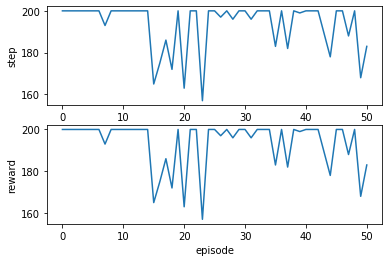

In [2]:
import matplotlib.pyplot as plt

# fit の結果を取得しておく
history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

# 結果を表示
plt.subplot(2,1,1)
plt.plot(history.history["nb_episode_steps"])
plt.ylabel("step")

plt.subplot(2,1,2)
plt.plot(history.history["episode_reward"])
plt.xlabel("episode")
plt.ylabel("reward")

plt.show()  # windowが表示されます。